# ELE 435/535 Lab 7: Support Vector Machine

### Due Date : 11/18 Monday 11:59 PM

In [55]:
# This code is given
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io

%matplotlib inline

## Linear Support Vector Machine

Generate 100 samples of 2-D data from a Gaussian density.

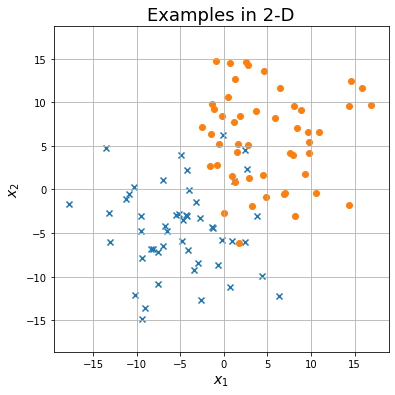

In [56]:
# This code is given
# Generate binary class dataset
center = [5,5]
n_samples = 100
np.random.seed(0)

X1 = np.random.normal(0,5,(int(n_samples/2),2)) - center
X2 = np.random.normal(0,5,(int(n_samples/2),2)) + center
X = np.concatenate((X1,X2),0)
Y = np.ones((n_samples,))
Y[:int(n_samples/2)] = -1

plt.figure(figsize=(6,6))
plt.scatter(X1[:,0],X1[:,1],marker='x')
plt.scatter(X2[:,0],X2[:,1],marker='o')
plt.ylabel('$x_2$', fontsize=14)
plt.xlabel('$x_1$', fontsize=14)
plt.title('Examples in 2-D',fontsize=18)
plt.axis([-20, 20, -20, 20])
plt.axis('equal')
plt.grid(True)
plt.show()

**1.** Train a support vector machine on the data using $C=1$. Plot the separating hyperplane (a line) that separates o and x data. Mark the support vectors separately (ex.circle around the point).

**Note:** You can use scikit-learn LinearSVC or SVC. When you use SVC, make sure you use linear kernel as SVC(kernel='linear'...).

In [57]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification

clf = LinearSVC(C=1.0, max_iter=10000)

In [58]:
clf.fit(X, Y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [59]:
w = clf.coef_
b = clf.intercept_

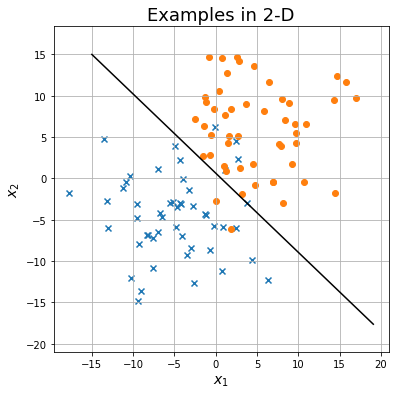

In [60]:
plt.figure(figsize=(6,6))
plt.scatter(X1[:,0],X1[:,1],marker='x')
plt.scatter(X2[:,0],X2[:,1],marker='o')

#plot the line
x1_0 = -15
x1_1 = (-w[0][0] * x1_0 - b) / w[0][1]
x2_0 = 15
x2_1 = (-w[0][0] * x2_0 - b) / w[0][1]
plt.plot([x1_0,x1_1], [x2_0,x2_1], 'k')


plt.ylabel('$x_2$', fontsize=14)
plt.xlabel('$x_1$', fontsize=14)
plt.title('Examples in 2-D',fontsize=18)
plt.axis([-20, 20, -20, 20])
plt.axis('equal')
plt.grid(True)
plt.show()

**2.** Draw the SVM hyperplane that separates the data using different values of $C$ ($10^{-3}$~$10^5$). And plot number of support vectors vs. $C$ (plot x-axis on a log scale). How does the number of support vectors change as $C$ increases and why does it change in that way? 

In [137]:
C_values= [1e-3, 1e-2, 1e-1, 1.0, 1e1, 1e2, 1e3, 1e4, 1e5]

In [115]:
def f(x, w, b):
    return (-w[0][0] * x - b) / w[0][1]

/Users/minh-thinguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/minh-thinguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/minh-thinguyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


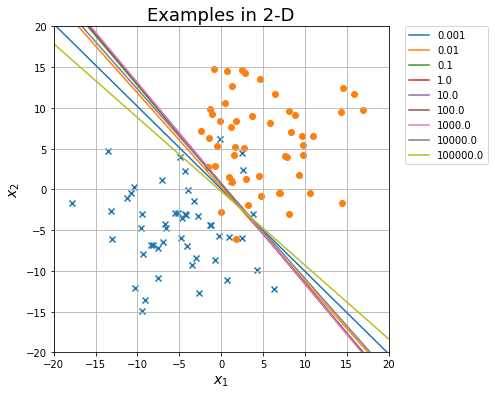

In [118]:
plt.figure(figsize=(6,6))
plt.scatter(X1[:,0],X1[:,1],marker='x')
plt.scatter(X2[:,0],X2[:,1],marker='o')
plt.xlim([-20,20])
plt.ylim([-20,20])
    
for i in range(len(C_values)):
    clf = LinearSVC(C=C_values[i], max_iter=1000000)
    clf.fit(X, Y)

    w = clf.coef_
    b = clf.intercept_

    #plot the line
    x_vector = np.linspace(-20,20,3)
    y_vector = np.linspace(-20,20,3)
    for j in range(len(x_vector)):
        y_vector[j] = f(x_vector[j],w,b)
    plt.plot(x_vector,y_vector, label=C_values[i])


plt.ylabel('$x_2$', fontsize=14)
plt.xlabel('$x_1$', fontsize=14)
plt.title('Examples in 2-D',fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.show()

In [140]:
from sklearn.svm import SVC
support_vector_count = np.zeros(len(C_values))

for i in range(len(C_values)):
    clf = SVC(C = C_values[i], kernel='linear')
    clf.fit(X, Y)
    support_vector_count[i] = len(clf.support_)

Text(0.5, 1.0, 'Examples in 2-D')

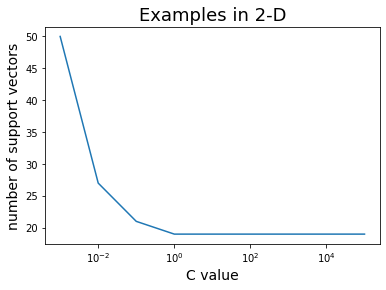

In [143]:
plt.plot(C_values,support_vector_count)
plt.xscale('log')
plt.xlabel('C value', fontsize=14)
plt.ylabel('number of support vectors', fontsize=14)
plt.title('Examples in 2-D',fontsize=18)

In [144]:
print("The number of support vectors decrease with higher penalty values in the SVM because the penalty places a penalty on the slack variables that measure outside the constraint which makes up the support vectors.  Thus, increasing the penalty will decrease the number of support vectors and more data points will lie within the range.")

The number of support vectors decrease with higher penalty values in the SVM because the penalty places a penalty on the slack variables that measure outside the constraint which makes up the support vectors.  Thus, increasing the penalty will decrease the number of support vectors and more data points will lie within the range.


## Binary Classification

Load the YALE database.

X_train: Train data (32256 x 1520)

Y_train: Train label (38 subjects (0~37))

X_test: Test data (32256 x 894)

Y_test: Test label

Train Data: 32256 x 1520
Test Data: 32256 x 894


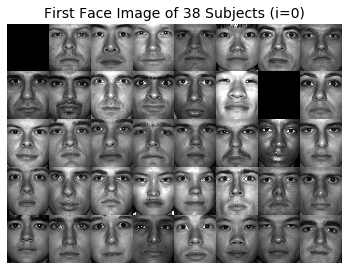

In [383]:
# This code is given
# Load the YALE database
# Train data (X_train): 32256 x 1520 (40 examples for 38 subjects)
# Train label (Y_train): 1520 x 1 (38 subjects (0 ~ 37))
# Test data (X_test): 32256 x 894 (Test examples vary for different subjects)
# Test label (Y_test): 894 x 1 (38 subjects (0 ~ 37))

YALE = io.loadmat('YALEBXF(3).mat') 
X = YALE['X']/255.
Y = YALE['Y']
nr, nc = 192, 168 # height = 192, width = 168
dim = nr * nc     # dimension = 32256
nex = X.shape[1]  # Total number of examples = 2414

nFc = 38          # Total number of faces
nImg = np.zeros(nFc+2) # Numper of examples for each person
for i in range(nFc+2):
    nImg[i] = (Y==i).sum()

ntr = 40
X_train = np.zeros((dim,nFc*ntr))
Y_train = np.zeros(nFc*ntr)
X_test = np.zeros((dim,nex-nFc*ntr))
Y_test = np.zeros(nex-nFc*ntr)

nImg_eff = nImg[np.where(nImg>0)]
nImg_test = nImg_eff - ntr
for i in range(nFc):
    X_train[:,i*ntr:(i+1)*ntr] = X[:,int(np.sum(nImg_eff[:i])):int(np.sum(nImg_eff[:i]))+40]
    Y_train[i*ntr:(i+1)*ntr] = i
    X_test[:,int(np.sum(nImg_test[:i])):int(np.sum(nImg_test[:i+1]))] = X[:,int(np.sum(nImg_eff[:i]))+40:int(np.sum(nImg_eff[:i+1]))]
    Y_test[int(np.sum(nImg_test[:i])):int(np.sum(nImg_test[:i+1]))] = i
    
print ('Train Data: %d x %d' %(X_train.shape[0],X_train.shape[1]))
print ('Test Data: %d x %d' %(X_test.shape[0],X_test.shape[1]))


def unpackcw(x,nr):
    return x.reshape(-1,nr).T

# Face board of 38 faces
faceIdx = 0 # index of face to display for each subject
Bh, Bw = 5, 8
FB = np.zeros((Bh*nr, Bw*nc))
for i in range(nFc+2):
    if nImg[i]>0:
        loc = np.where(Y==i)[1]
        x = X[:,loc[faceIdx]]
        A = unpackcw(x,nr)
        row, col = divmod(i,Bw)
        rpt, cpt = row*nr, col*nc
        FB[rpt:rpt+nr, cpt:cpt+nc] = A
plt.figure(figsize = (6,6))
plt.imshow(FB, cmap='gray')
plt.axis('off')
plt.title("First Face Image of 38 Subjects (i=%i)" %faceIdx, fontsize=14)
plt.show()

**3.** Center both the training data and testing data using the mean of the training data. Then project the training data and testing data onto the first 128 principal components of the centered training data.

**Note:** Output data matrix should be 128 x N for both the training data and the testing data (in the reduced dimension).

In [450]:
#center training and testing data
centered_train = X_train - np.mean(X_train,axis=1)[:,None]
centered_test = X_test - np.mean(X_train,axis=1)[:,None]

In [451]:
# project training and testing data onto first 128 principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=128).fit(X_train.T)


projected_train = pca.transform(X_train.T).T
projected_test = pca.transform(X_test.T).T

**4.** Train the binary classifier using support vector machine to classify subject 0 and subject 1. Use the projected data. Plot accuracy vs. $C$ for $C=10^{-5}$~$10^{5}$ (plot x-axis on a log scale). 

In [452]:
C_values_new= [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 1e1, 1e2, 1e3, 1e4, 1e5]

In [455]:
#training data 

#take subject 0 and subject 1
#40 examples for 38 subjects in training data

# X_train: Train data (32256 x 1520)
# Y_train: Train label (38 subjects (0~37))
# X_test: Test data (32256 x 894)
# Y_test: Test label

#train the training data 
# find examples belonging to subject 0 and 1
accuracy_values = np.zeros(len(C_values_new),)

for i in range(len(C_values_new)):
    search_values = [0,1]
    index_x = np.isin(Y_train, search_values)
    index_vector = np.where(index_x)
    
    X_data = projected_train[:,index_vector[0]]
    Y_data = Y_train[index_vector[0]]

    clf = SVC(C = C_values_new[i], kernel='linear', gamma = 'auto')
    clf.fit(X_data.T, Y_data)
    predict_Y = clf.predict(X_data.T)
    
    count_correct = predict_Y-Y_data
    accuracy_values[i] = (80 - np.count_nonzero(count_correct))/80

Text(0.5, 1.0, 'Subjects 0/1: Train')

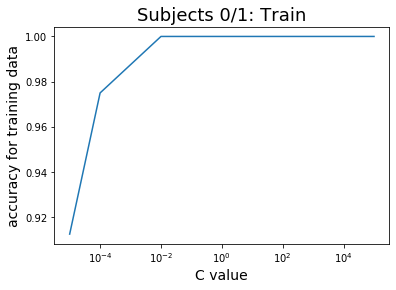

In [456]:
plt.plot(C_values_new,accuracy_values)
plt.xscale('log')
plt.xlabel('C value', fontsize=14)
plt.ylabel('accuracy for training data', fontsize=14)
plt.title('Subjects 0/1: Train',fontsize=18)

In [458]:
#test data
accuracy_values_test = np.zeros(len(C_values_new),)

for i in range(len(C_values_new)):
    search_values = [0,1]
    index_x = np.isin(Y_test, search_values)
    index_vector = np.where(index_x)
    X_data_test = projected_test[:,index_vector[0]]
    Y_data_test = Y_test[index_vector[0]]

    clf = SVC(C = C_values_new[i], kernel='linear')
    clf.fit(X_data.T, Y_data)
    predict_Y_test = clf.predict(X_data_test.T)

    count_correct = predict_Y_test-Y_data_test
    accuracy_values_test[i] = (len(Y_data_test) - np.count_nonzero(count_correct))/float(len(Y_data_test))

Text(0.5, 1.0, 'Subjects 0/1: Test')

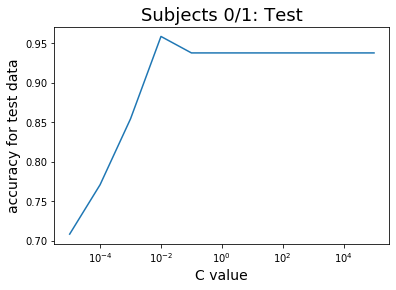

In [459]:
plt.plot(C_values_new,accuracy_values_test)
plt.xscale('log')
plt.xlabel('C value', fontsize=14)
plt.ylabel('accuracy for test data', fontsize=14)
plt.title('Subjects 0/1: Test',fontsize=18)

**5.** Repeat 4 with subject 2 and subject 25.

Text(0.5, 1.0, 'Subjects 4/25: Train')

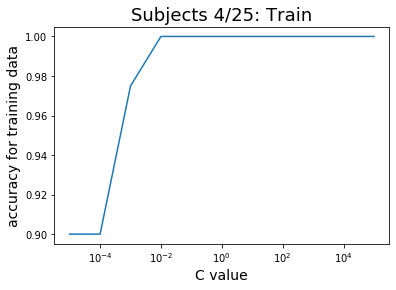

In [460]:
#training data 

#take subject 0 and subject 1
#40 examples for 38 subjects in training data

# X_train: Train data (32256 x 1520)
# Y_train: Train label (38 subjects (0~37))
# X_test: Test data (32256 x 894)
# Y_test: Test label

#train the training data 
# find examples belonging to subject 0 and 1
accuracy_values = np.zeros(len(C_values_new),)

for i in range(len(C_values_new)):
    search_values = [2,25]
    index_x = np.isin(Y_train, search_values)
    index_vector = np.where(index_x)
    X_data = projected_train[:,index_vector[0]]
    Y_data = Y_train[index_vector[0]]

    clf = SVC(C = C_values_new[i], kernel='linear')
    clf.fit(X_data.T, Y_data)
    predict_Y = clf.predict(X_data.T)

    count_correct = predict_Y-Y_data
    accuracy_values[i] = (80 - np.count_nonzero(count_correct))/80.0
    
plt.plot(C_values_new,accuracy_values)
plt.xscale('log')
plt.xlabel('C value', fontsize=14)
plt.ylabel('accuracy for training data', fontsize=14)
plt.title('Subjects 4/25: Train',fontsize=18)

Text(0.5, 1.0, 'Subjects 4/25: Test')

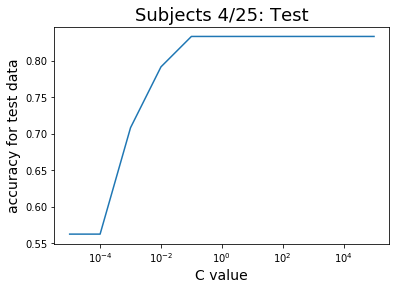

In [461]:
#test data
accuracy_values_test = np.zeros(len(C_values_new),)

for i in range(len(C_values_new)):
    search_values = [2,25]
    index_x = np.isin(Y_test, search_values)
    index_vector = np.where(index_x)
    X_data_test = projected_test[:,index_vector[0]]
    Y_data_test = Y_test[index_vector[0]]

    clf = SVC(C = C_values_new[i], kernel='linear')
    clf.fit(X_data.T, Y_data)
    predict_Y_test = clf.predict(X_data_test.T)

    count_correct = predict_Y_test-Y_data_test
    accuracy_values_test[i] = (len(Y_data_test) - np.count_nonzero(count_correct))/float(len(Y_data_test))
    
plt.plot(C_values_new,accuracy_values_test)
plt.xscale('log')
plt.xlabel('C value', fontsize=14)
plt.ylabel('accuracy for test data', fontsize=14)
plt.title('Subjects 4/25: Test',fontsize=18)

## Multi-class Classification

Now we will use support vector machine for multi-class classification.

**6.** Standardize (centering and transforming to have unit variance for all features) the train data and test data. Use the projected data.

**Note:** Use sklearn.preprocessing.StandardScaler.

In [499]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(projected_train.T)

standard_train = scaler.transform(projected_train.T)
standard_test = scaler.transform(projected_test.T)

**7.** Train one-vs-rest classifier on the train data to classify subjects 0~37. Use support vector machine with $C=0.01$. Plot bar graph of individual subject's accuracy. What is the overall accuracy of the classifier?

**Note:** Use sklearn.multiclass.OneVsRestClassifier.

In [500]:
C = 0.01

In [501]:
X_train_new = standard_train
X_test_new = standard_test

In [502]:
#train

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

predict_y_train = OneVsRestClassifier(SVC(C = 0.01, kernel='linear')).fit(X_train_new, Y_train).predict(X_train_new) 
accuracy_vector = predict_y_train - Y_train
accuracy_final_train = np.zeros(38,)

# individual accuracy 
for i in range(38):
    index_search = np.isin(Y_train, i)
    index_vector = np.where(index_search)
    accuracy_search = accuracy_vector[index_vector]
    accuracy = (len(accuracy_search) - np.count_nonzero(accuracy_search))/float(len(accuracy_search))
    accuracy_final_train[i] = accuracy

In [503]:
subject_vector = np.linspace(0,37,38)

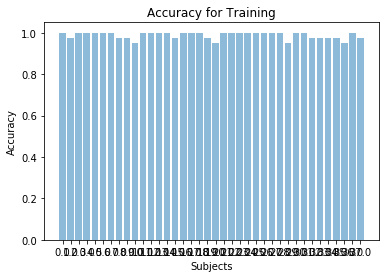

In [504]:
plt.bar(subject_vector, accuracy_final_train, align='center', alpha=0.5)
plt.xticks(subject_vector, subject_vector)
plt.ylabel('Accuracy')
plt.xlabel('Subjects')
plt.title('Accuracy for Training')

plt.show()

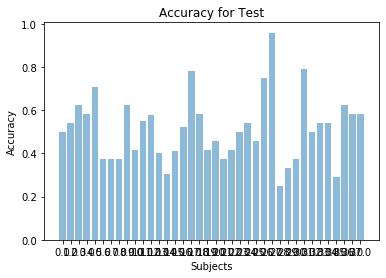

In [505]:
#test
subject_vector = np.linspace(0,37,38)
predict_y_test = OneVsRestClassifier(SVC(C = 0.01, kernel='linear', gamma='auto')).fit(X_train_new, Y_train).predict(X_test_new) 
accuracy_vector = predict_y_test - Y_test
accuracy_final_test = np.zeros(38,)

# individual accuracy 
for i in range(38):
    index_search = np.isin(Y_test, i)
    index_vector = np.where(index_search)
    accuracy_search = accuracy_vector[index_vector]
    accuracy = (len(accuracy_search) - np.count_nonzero(accuracy_search))/float(len(accuracy_search))
    accuracy_final_test[i] = accuracy
    
plt.bar(subject_vector, accuracy_final_test, align='center', alpha=0.5)
plt.xticks(subject_vector, subject_vector)
plt.ylabel('Accuracy')
plt.xlabel('Subjects')
plt.title('Accuracy for Test')

plt.show()

In [506]:
print(np.mean(accuracy_final_test))

0.5143877349917335
